# 1. Name: Huzefa Sadikot
# 2. UID: U01856444
# 3. Class CRN: 72463
# Assignment 1 

# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import tensorflow_data_validation as tfdv
import apache_beam as beam
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import EarlyStopping





# Importing the dataset. Our dataset is contained in a csv file hence we use the pandas function read_csv()

In [2]:
df=pd.read_csv('housing.csv')

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Task A


Perform an explanatory data analysis (EDA) on Median House Prices from California districts derived from the 1990 census. Besides the need to build a model based on the data provided, you are asked to look for issues in the data and find correlation among the various variables in order to improve median house price predictions.

# Task 1: Data Preparation

# Check for missing values

In [3]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


#  We replace NAN Values with avergae of particular cols

In [4]:
def replace_nan_with_column_mean(df):
 
    # Calculate the mean for each column, excluding NaN values
    column_means = df.mean(skipna=True)
    
    # Replace NaN values with the respective column mean
    df_filled = df.fillna(column_means)
    
    return df_filled


df = replace_nan_with_column_mean(df)


C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\1712461300.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean(skipna=True)


In [5]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Task 2

# Check for dtypes

In [6]:
data_types = df.dtypes
print("\nData Types:")
print(data_types)


Data Types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


# Task 3: Outliers Detection


# Box plots for numerical columns to detect outliers


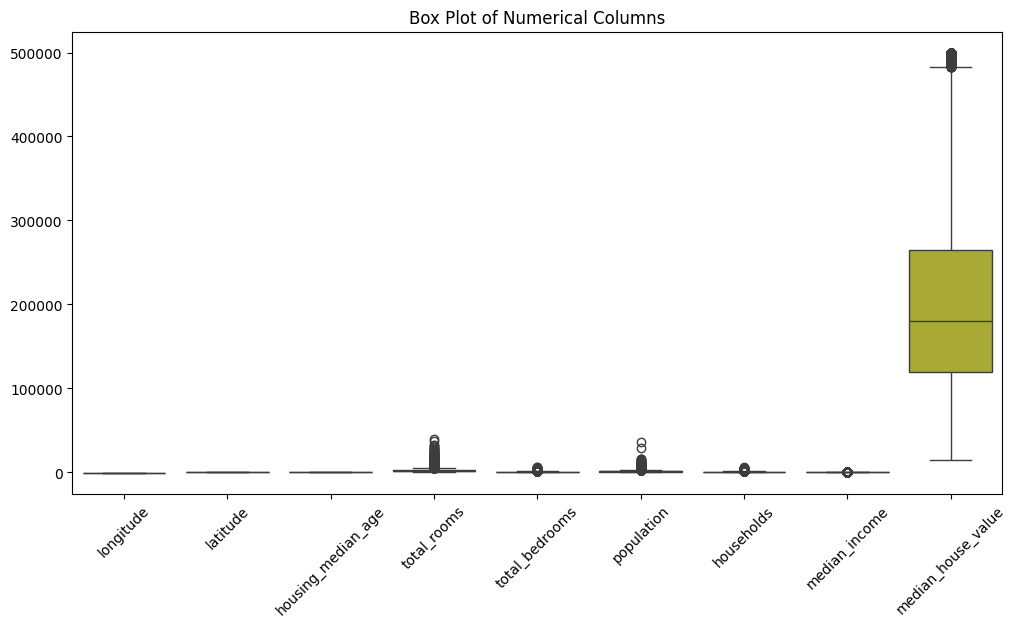

In [7]:
numerical_columns = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_columns)
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

# Replace Outliers

# Task 4: Data Transformation


# Convert 'ocean_proximity' categorical data to numeric using one-hot encoding


In [8]:
# Display the transformed DataFrame
print("\nTransformed Data:")
print(df.head())


Transformed Data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


# Find out correlation between each column and plot a heatmap

Correlation and heatmap are tools commonly used in data analysis and data visualization to understand relationships between variables in a dataset.

Correlation:
Correlation is a statistical measure that quantifies the degree and direction of a linear relationship between two variables. It indicates how closely two variables move together or in opposite directions. There are different types of correlation coefficients, with the Pearson correlation coefficient being the most commonly used:

Positive Correlation: When one variable increases, the other also tends to increase. The correlation coefficient is positive and lies between 0 and 1.

Negative Correlation: When one variable increases, the other tends to decrease. The correlation coefficient is negative and lies between -1 and 0.

No Correlation: When there is no apparent linear relationship between the variables, the correlation coefficient is close to 0.

Correlation can help you understand whether changes in one variable are associated with changes in another variable. However, it's important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other; there may be other underlying factors at play.

Heatmap:
A heatmap is a graphical representation that uses colors to visualize data in a two-dimensional matrix or table. It's particularly useful for displaying correlations between multiple variables in a dataset. In the context of correlation, a heatmap can be used to visualize the correlation matrix.


C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\2275979227.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


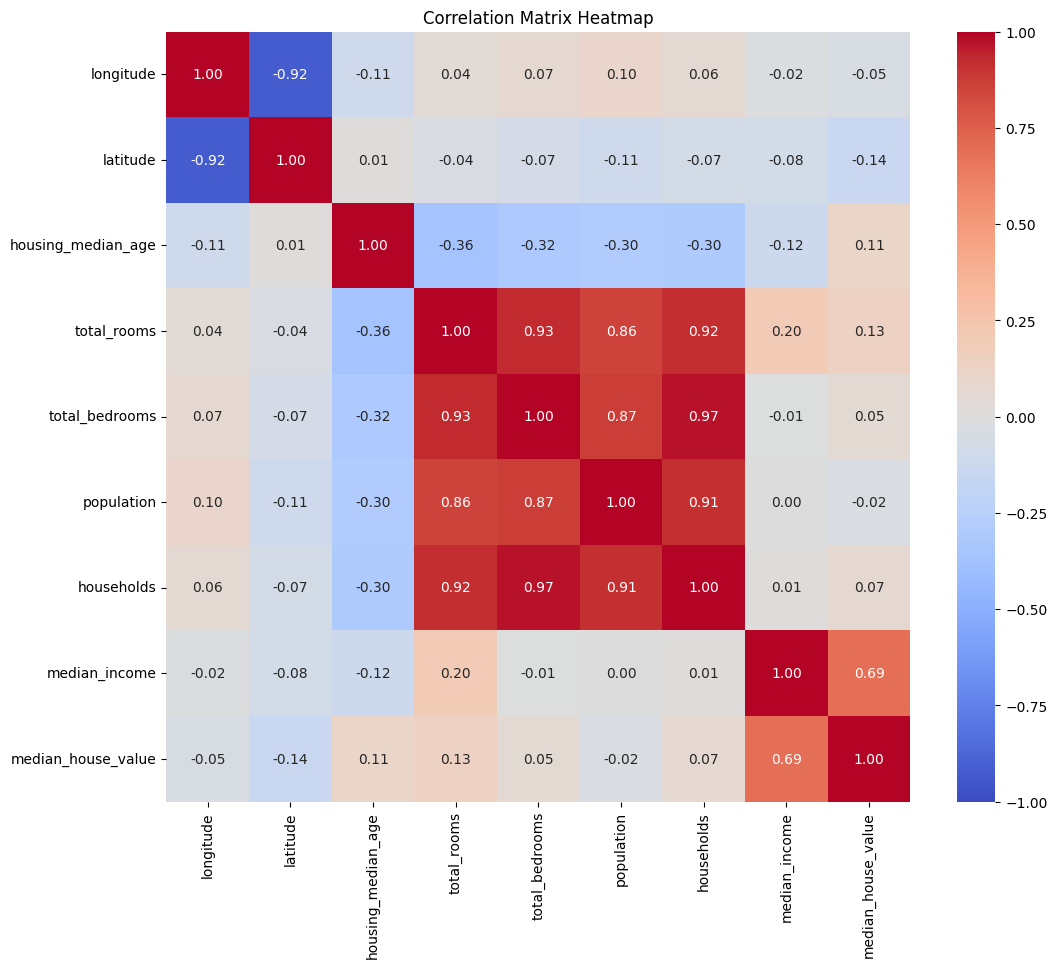

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Convert the correlation values to percentages
correlation_matrix_percentages = correlation_matrix * 100

# Display the correlation matrix as percentages
print("Correlation Matrix (in percentages):")
print(correlation_matrix_percentages)


Correlation Matrix (in percentages):
                     longitude    latitude  housing_median_age  total_rooms  \
longitude           100.000000  -92.466443          -10.819681     4.456798   
latitude            -92.466443  100.000000            1.117267    -3.609960   
housing_median_age  -10.819681    1.117267          100.000000   -36.126220   
total_rooms           4.456798   -3.609960          -36.126220   100.000000   
total_bedrooms        6.925967   -6.665842          -31.899828    92.725270   
population            9.977322  -10.878475          -29.624424    85.712597   
households            5.531009   -7.103543          -30.291601    91.848449   
median_income        -1.517587   -7.980913          -11.903399    19.804965   
median_house_value   -4.596662  -14.416028           10.562341    13.415311   

                    total_bedrooms  population  households  median_income  \
longitude                 6.925967    9.977322    5.531009      -1.517587   
latitude          

C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\30529679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


# Perform Statistical Analysis on the above data

Descriptive Statistics:

Descriptive statistics were computed for all numeric columns in the dataset. These statistics provide a summary of the central tendency, spread, and shape of the data distribution.
Key descriptive statistics include measures like mean (average), standard deviation (a measure of data dispersion), minimum, maximum, and quartiles (25th, 50th, and 75th percentiles) for each numeric column.
Descriptive statistics help in understanding the basic properties of the dataset, such as the typical value and data variability.
Correlation Analysis:

A correlation matrix was calculated to determine the pairwise correlations between all numeric variables in the dataset.
The correlation coefficient, specifically the Pearson correlation coefficient, measures the strength and direction (positive or negative) of linear relationships between variables.
The correlation matrix provides a numerical representation of how variables are related to each other, which can help identify potential associations and dependencies.
Skewness and Kurtosis:

Skewness and kurtosis were calculated for each numeric column.
Skewness measures the asymmetry of the data distribution. Positive skewness indicates a tail on the right side of the distribution, while negative skewness indicates a tail on the left side.
Kurtosis measures the "tailedness" of the distribution. High kurtosis indicates heavy tails, while low kurtosis indicates light tails.
Skewness and kurtosis values provide information about the shape and nature of the data distribution.

Descriptive Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900

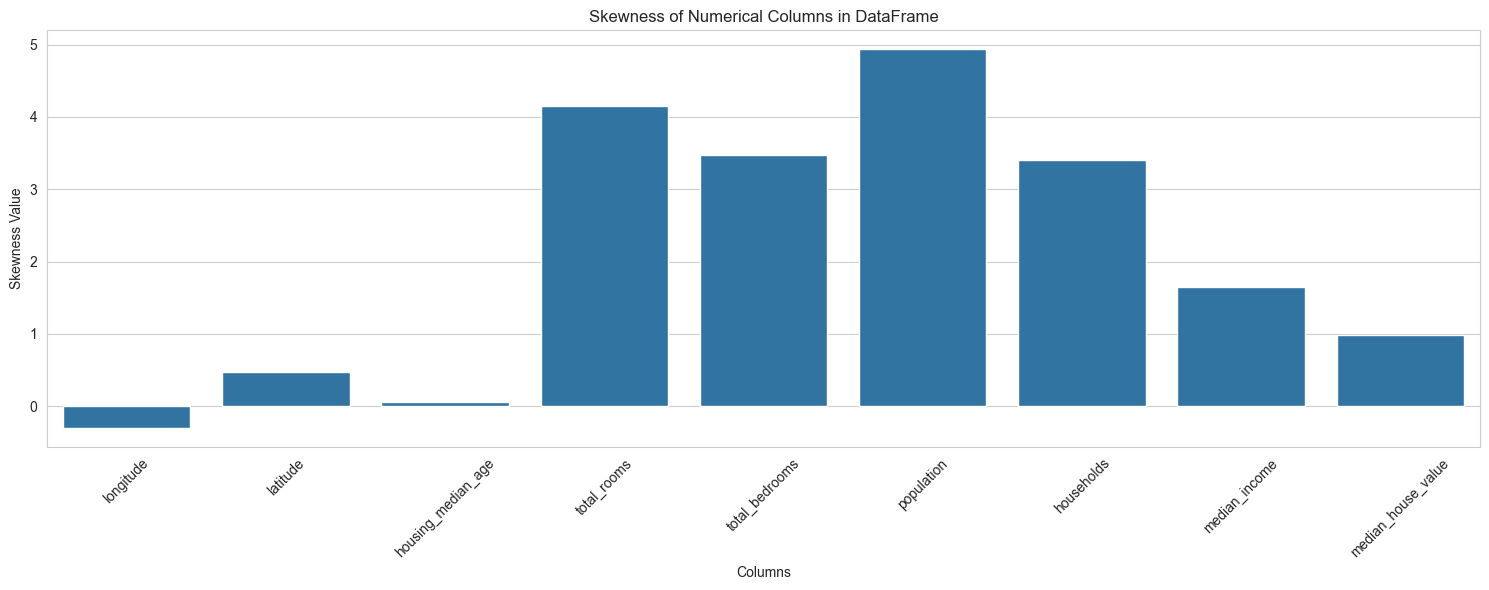

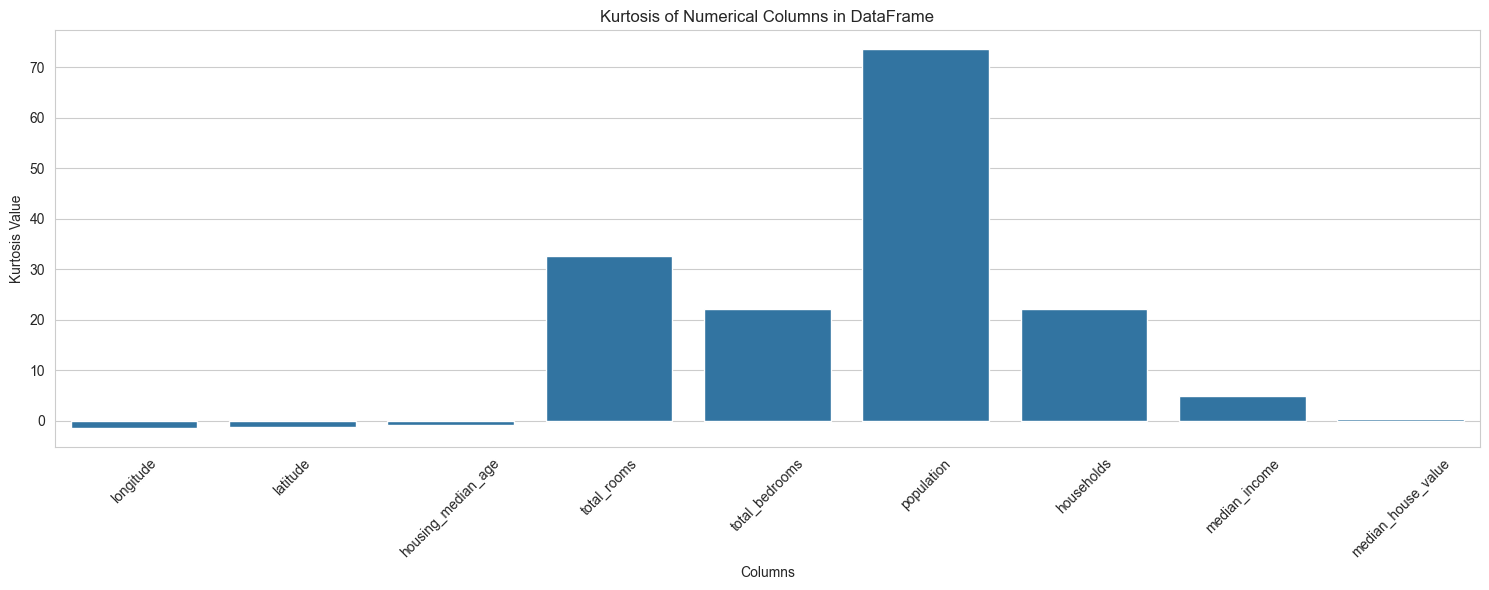

In [11]:
# Descriptive statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Skewness and kurtosis
skewness = df.skew(numeric_only=True)
kurtosis = df.kurtosis(numeric_only=True)
print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Plotting skewness
plt.figure(figsize=(15, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title('Skewness of Numerical Columns in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Skewness Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting kurtosis
plt.figure(figsize=(15, 6))
sns.barplot(x=kurtosis.index, y=kurtosis.values)
plt.title('Kurtosis of Numerical Columns in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Kurtosis Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# We detect and remove outliers present in the dataset 

C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\3755117821.py:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\3755117821.py:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\3755117821.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  criteria = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))


Number of outliers removed: 3031


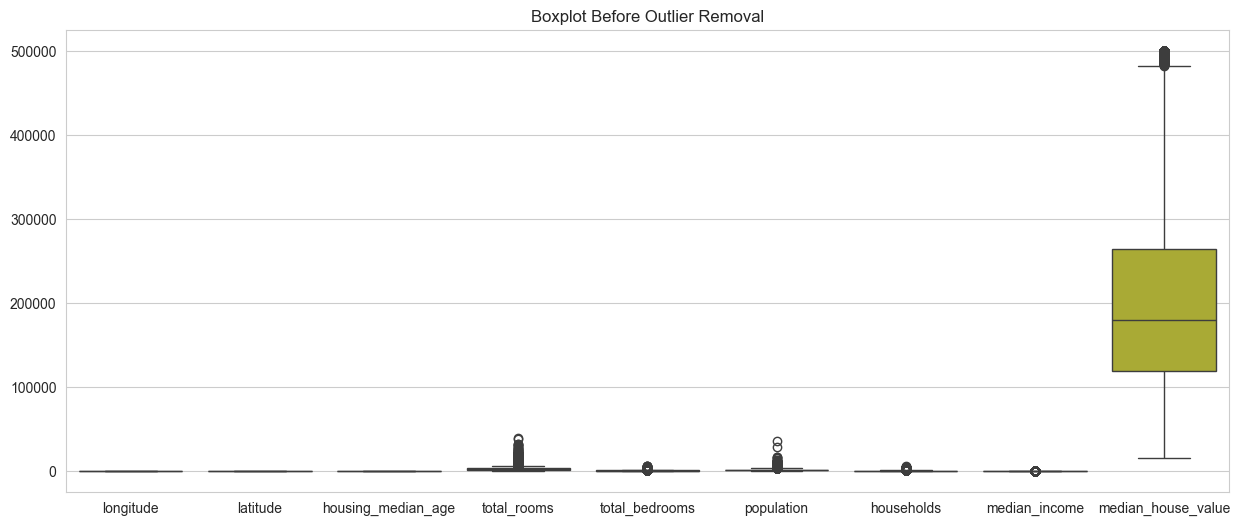

C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\3755117821.py:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\3755117821.py:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\3755117821.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  criteria = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))


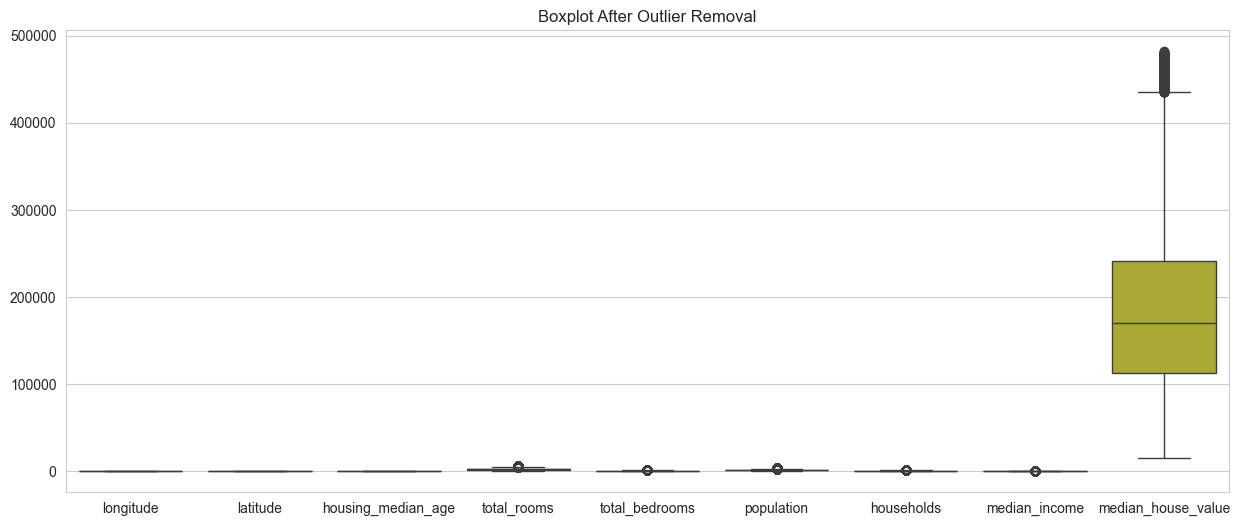

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# Function to remove outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    criteria = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    df_no_outliers = df[~criteria.any(axis=1)]
    return df_no_outliers



# Before removal
initial_count = df.shape[0]

# Remove outliers
df_clean = remove_outliers(df)

# After removal
after_removal_count = df_clean.shape[0]

# Calculate the number of rows (outliers) removed
num_outliers_removed = initial_count - after_removal_count

print(f"Number of outliers removed: {num_outliers_removed}")







# Plot boxplots before outlier removal
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.title("Boxplot Before Outlier Removal")
plt.show()

# Remove outliers
df_clean = remove_outliers(df)

# Plot boxplots after outlier removal
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_clean)
plt.title("Boxplot After Outlier Removal")
plt.show()


# Perform EDA

Plotting Visualizations using pandas

We will plot the following Visualisations:

1. Feature Histograms
2. Scatter plot for total_bedrooms vs median_house_value
3. Scatter plot for median_income vs median_house_value
4. Violin Plot
5. Bubble Chart
6. 3d Scatter Plot



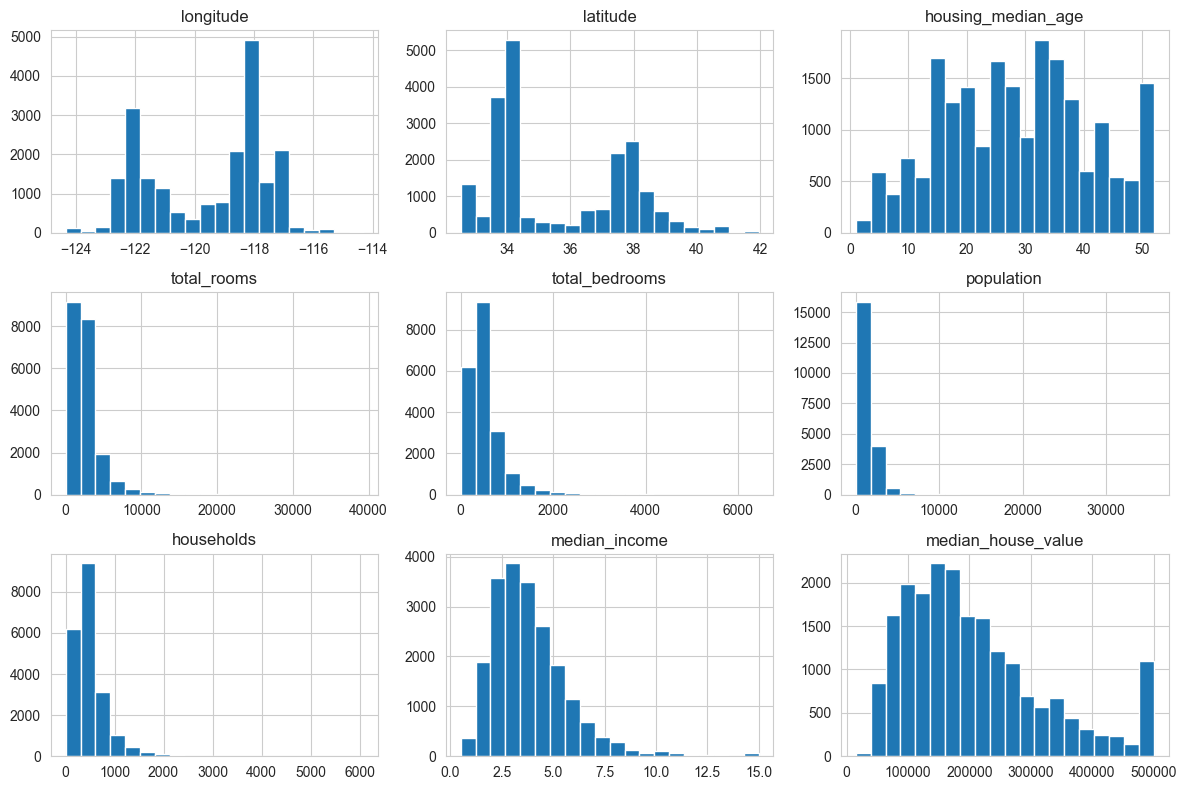

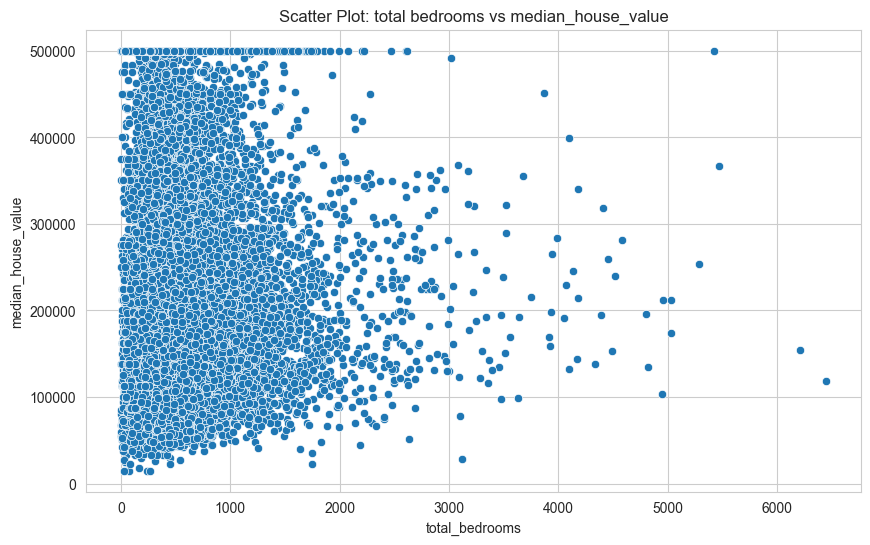

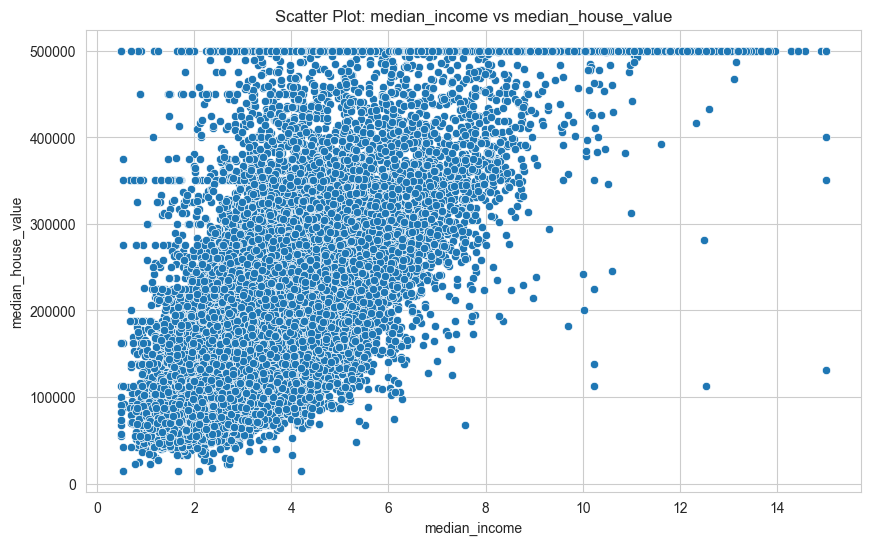

In [13]:
# 1. Feature Histograms
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# 2. Scatter plot for bedrooms_per_room vs median_house_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df)
plt.title('Scatter Plot: total bedrooms vs median_house_value')
plt.show()

# 3. Scatter plot for income_per_capita vs median_house_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Scatter Plot: median_income vs median_house_value')
plt.show()

# Violin Plot To observe the distribution of median_house_value across different ocean_proximity categories.


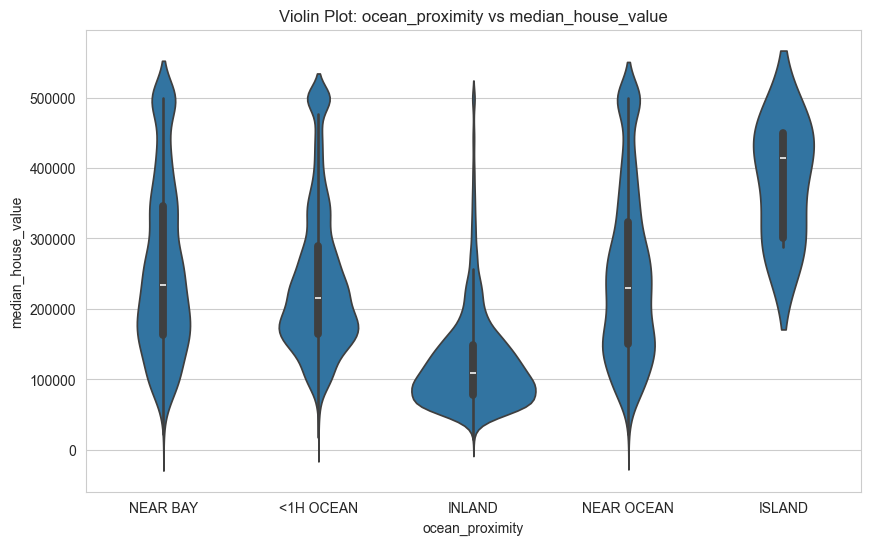

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Violin Plot: ocean_proximity vs median_house_value')
plt.show()

Box Plot:To understand the distribution and outliers for the median_income relative to the ocean_proximity categories.

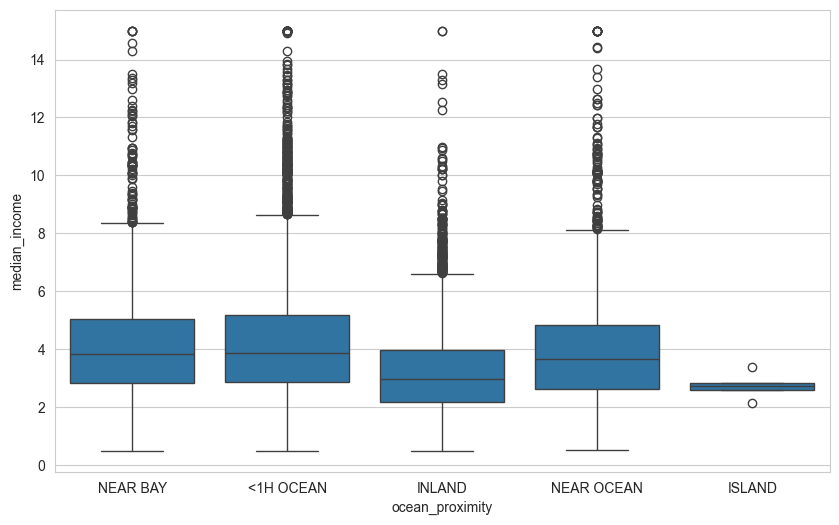

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=df)
plt.show()


# Bubble Chart: To plot longitude and latitude to visualize the spatial distribution of the data, with the size of the bubble representing the population and color representing median_house_value.

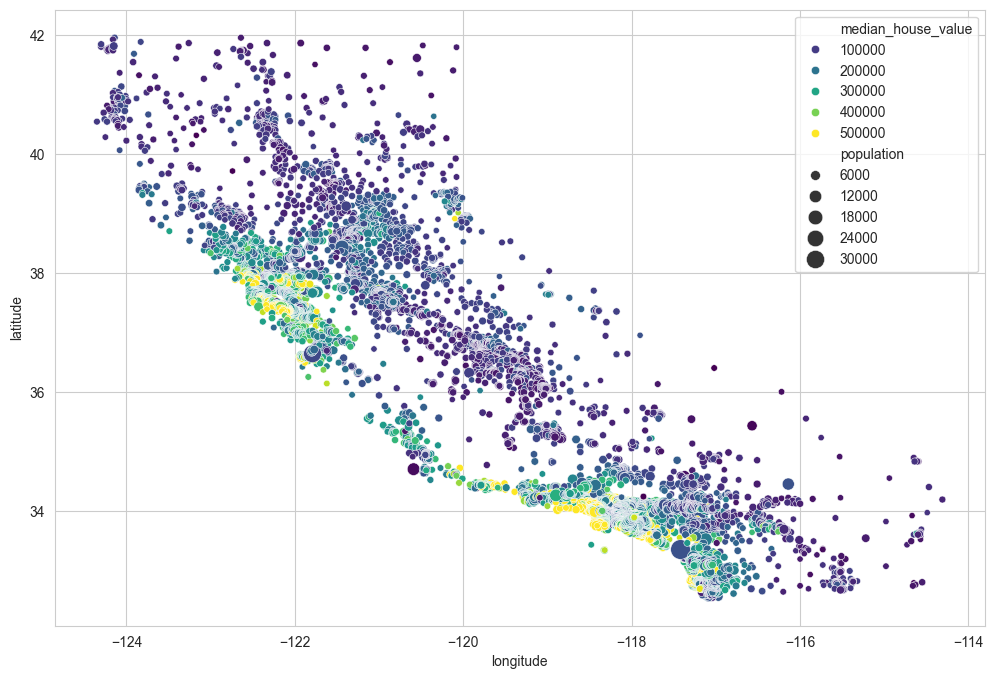

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, size='population', hue='median_house_value', sizes=(20, 200), palette='viridis')
plt.show()


# Plotting Visualizations using The TFDV (TensorFlow Data Validation) module with the powerful graphical statistics generated (apache beam library…)

Dataset Statistics at a Glance:

Number of Examples: Total number of rows or examples in your dataset.
Features: Total number of columns or features.
Feature Statistics:
For each feature (or column) in your dataset, you'll see:

Missing: The percentage and number of examples (rows) that lack a value for this feature.

Min and Max: The minimum and maximum values of this feature (for numerical features).

Mean and Median: The average and median values of this feature (for numerical features).

Zeroes: Percentage of examples that have a value of zero (for numerical features).

Top Values: For categorical features, you'll see the most common values and their frequency.

Feature Distribution: A histogram displaying the distribution of values for that feature. For numerical features, this will show ranges of values, and for categorical features, it will show individual categories. 

This is especially useful to quickly identify any anomalies or outliers in your data.

In [17]:
# Compute Stats
stats = tfdv.generate_statistics_from_csv(data_location='housing.csv')

# Visualize the statistics
tfdv.visualize_statistics(stats)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


# Split the data into training and testing

1. Training Data: 80 Percent of Original Data
2. Testing Data: 20 Percent of original Data

In [18]:

# Define the features (X) and the target variable (y)
X = df.drop(columns=['median_house_value'])  # Features
y = df['median_house_value']  # Target variable

# Resetting index to avoid potential misalignment issues
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing shapes to ensure consistency
print("Shapes of datasets:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)



# Reconstruct train and test dataframes
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)



Shapes of datasets:
X_train: (16512, 9)
y_train: (16512,)
X_test: (4128, 9)
y_test: (4128,)


# Perform Feature Engineering

Feature Engineering is a process of creating new features from existing features or modify the existing ones. This is done to:

1. Get better insights to the dataset and its features
2. Improve the accuracy of the models


Here are some of the common features extracted from the dataset:

1. Population Density: Create a new feature called "population_density" by dividing the "population" by the "total_rooms" or "total_bedrooms." This can help capture the density of residents in a particular area.

2. Rooms per Household: Calculate the "rooms_per_household" by dividing "total_rooms" by "households." This feature can represent the average number of rooms in each household.

3. Bedrooms per Room: Calculate the "bedrooms_per_room" by dividing "total_bedrooms" by "total_rooms." This can provide insight into the ratio of bedrooms to total rooms, which may be useful in predicting housing values.

4. Income per Capita: Create a new feature called "income_per_capita" by dividing "median_income" by "population." This can help understand the income distribution at the community level.

5. Age-Category: Group the "housing_median_age" into categories, such as "young," "middle-aged," and "old," and encode them as numerical values (e.g., 1, 2, 3). This can help the model capture the effect of the age of housing on median house values.

6. Distance to Ocean: Convert the "ocean_proximity" column into numerical values, such as 1 for "NEAR BAY," 2 for "INLAND," and so on. You can use one-hot encoding or label encoding for this.

7. Geographical Clustering: You can use clustering techniques like k-means clustering on the longitude and latitude coordinates to group data points into clusters representing different neighborhoods or regions. Assign each data point to its cluster.

8. Interaction Features: Create interaction features by multiplying or combining existing features. For example, you can multiply "total_rooms" by "median_income" to create a feature that represents the interaction between the number of rooms and the median income.

9. Polynomial Features: Introduce polynomial features by squaring or cubing certain numerical features. For example, you can square "median_income" to capture non-linear relationships.




Feature Scaling: Scale numerical features to have a similar range. Common scaling methods include Min-Max scaling or Standardization (z-score scaling). This ensures that features with different units have a similar impact on the model.

In [19]:
from scipy import stats

# Define the features (X) and the target variable (y)
X = df.drop(columns=['median_house_value'])  # Features
y = df['median_house_value']  # Target variable

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering (Apply these transformations to both X_train and X_test)
# Feature 1: Population Density
X_train['population_density'] = X_train['population'] / X_train['total_rooms']
X_test['population_density'] = X_test['population'] / X_test['total_rooms']

# Feature 2: Rooms per Household
X_train['rooms_per_household'] = X_train['total_rooms'] / X_train['households']
X_test['rooms_per_household'] = X_test['total_rooms'] / X_test['households']

# Feature 3: Bedrooms per Room
X_train['bedrooms_per_room'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_test['bedrooms_per_room'] = X_test['total_bedrooms'] / X_test['total_rooms']

# Feature 4: Income per Capita
X_train['income_per_capita'] = X_train['median_income'] / X_train['population']
X_test['income_per_capita'] = X_test['median_income'] / X_test['population']

# Feature 5: Age-Category
X_train['age_category'] = pd.cut(X_train['housing_median_age'], bins=[0, 10, 30, 100], labels=[1, 2, 3])
X_test['age_category'] = pd.cut(X_test['housing_median_age'], bins=[0, 10, 30, 100], labels=[1, 2, 3])

# Feature 6: Distance to Ocean (Label Encoding)
ocean_proximity_mapping = {'NEAR BAY': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5}
X_train['ocean_proximity'] = X_train['ocean_proximity'].map(ocean_proximity_mapping)
X_test['ocean_proximity'] = X_test['ocean_proximity'].map(ocean_proximity_mapping)

# Feature 7: Interaction Feature
X_train['rooms_income_interaction'] = X_train['total_rooms'] * X_train['median_income']
X_test['rooms_income_interaction'] = X_test['total_rooms'] * X_test['median_income']

# Feature 8: Polynomial Feature (Squaring median_income)
X_train['median_income_squared'] = X_train['median_income'] ** 2
X_test['median_income_squared'] = X_test['median_income'] ** 2

# Feature Scaling (MinMax Scaling)
scaler = MinMaxScaler()
X_train[['median_income', 'population', 'total_rooms', 'total_bedrooms']] = scaler.fit_transform(X_train[['median_income', 'population', 'total_rooms', 'total_bedrooms']])
X_test[['median_income', 'population', 'total_rooms', 'total_bedrooms']] = scaler.transform(X_test[['median_income', 'population', 'total_rooms', 'total_bedrooms']])

# Missing Value Handling (Imputation with Median)
median_total_bedrooms = X_train['total_bedrooms'].median()
X_train['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
X_test['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Outlier Detection (Z-Score) for training set
z_scores_train = stats.zscore(X_train[['median_income', 'population', 'total_rooms', 'total_bedrooms']])
mask_train = (z_scores_train < 3).all(axis=1)
X_train = X_train[mask_train]
y_train = y_train[mask_train]

# Outlier Detection (Z-Score) for testing set
z_scores_test = stats.zscore(X_test[['median_income', 'population', 'total_rooms', 'total_bedrooms']])
mask_test = (z_scores_test < 3).all(axis=1)
X_test = X_test[mask_test]
y_test = y_test[mask_test]


# Feature Selection (Selecting relevant columns)
selected_features = ['population_density', 'rooms_per_household', 'bedrooms_per_room', 'income_per_capita', 'age_category', 'ocean_proximity', 'rooms_income_interaction', 'median_income_squared']
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# # Display the modified training and testing sets
# print(X_train.head())
# print(X_test.head())


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15812, 8)
(3939, 8)
(15812,)
(3939,)


In [20]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())
print(y_test.isnull().sum())


population_density             0
rooms_per_household            0
bedrooms_per_room              0
income_per_capita              0
age_category                   0
ocean_proximity             7005
rooms_income_interaction       0
median_income_squared          0
dtype: int64
0
population_density             0
rooms_per_household            0
bedrooms_per_room              0
income_per_capita              0
age_category                   0
ocean_proximity             1704
rooms_income_interaction       0
median_income_squared          0
dtype: int64
0


# We see nan values in the dataset hence we replace it with the mean

In [21]:
import pandas as pd

def replace_nan_with_mean(df, mean_values):
  
    return df.fillna(mean_values)

# Example of usage:
X_train_mean = X_train.mean()
X_train = replace_nan_with_mean(X_train, X_train_mean)

y_train_mean = y_train.mean()
y_train = replace_nan_with_mean(y_train, y_train_mean)

X_test_mean = X_test.mean()
X_test = replace_nan_with_mean(X_test, X_test_mean)

y_test_mean = y_test.mean()
y_test = replace_nan_with_mean(y_test, y_test_mean)


C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\1536791118.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train_mean = X_train.mean()
C:\Users\sadik\AppData\Local\Temp\ipykernel_18340\1536791118.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test_mean = X_test.mean()


median_income_squared       0.654016
rooms_income_interaction    0.439784
ocean_proximity             0.388236
rooms_per_household         0.120145
income_per_capita           0.117066
age_category                0.073981
population_density         -0.088999
bedrooms_per_room          -0.214793
dtype: float64


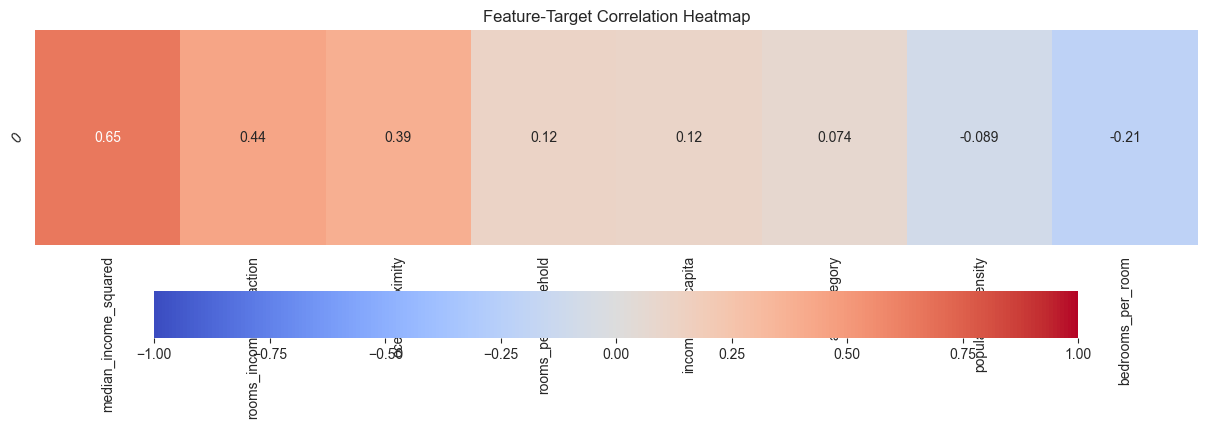

In [22]:


# Compute the correlation of each feature with the target variable
correlations = X_train.apply(lambda x: x.corr(y_train))

# Sort correlations for better visibility
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)

# For heatmap, we'll reshape the sorted_correlations into a DataFrame
correlation_df = pd.DataFrame(sorted_correlations).T

# Plot the heatmap of the correlations
plt.figure(figsize=(15, 4))  # Adjusting figure size for better visualization
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"orientation": "horizontal"}, annot_kws={"size": 10})
plt.yticks(rotation=45)
plt.title("Feature-Target Correlation Heatmap")
plt.show()








# TO avoid the training time and to avoid the size of the data we calculate correlation with the target variable and only keep those columns where correlation is greater than 10 percent

In [23]:
# Identify features with correlation below the absolute threshold of 0.10
low_correlation_features = sorted_correlations[sorted_correlations.abs() < 0.10].index.tolist()

# Drop these features from the training and testing sets
X_train = X_train.drop(columns=low_correlation_features)
X_test = X_test.drop(columns=low_correlation_features)

print(X_train.head())  # To check if the columns have been removed


# Assuming xtrain, xtest, ytrain, ytest are all pandas DataFrames or compatible structures
# First, let's combine the feature data (x) and the label data (y) for both training and testing sets

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Now save the combined data to CSV files

train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

       rooms_per_household  bedrooms_per_room  income_per_capita  \
14196             5.017657           0.200576           0.001417   
8267              4.473545           0.232703           0.002901   
17445             5.645833           0.174486           0.004542   
14265             4.002817           0.258269           0.001370   
2271              6.268421           0.180940           0.004067   

       ocean_proximity  rooms_income_interaction  median_income_squared  
14196              3.0                10189.5096              10.624992  
8267               3.0                12893.8750              14.535156  
17445              3.0                 7884.5011              17.274830  
14265              3.0                 2760.2925               3.773306  
2271               2.0                 8466.1044              12.632338  


# Plotting Visualizations using The TFDV (TensorFlow Data Validation) module with the powerful graphical statistics generated (apache beam library…) o the training and testing dataset to better understand them

In [24]:

# Generate statistics for training data
train_stats = tfdv.generate_statistics_from_csv(data_location='train.csv')

# Generate statistics for test data
test_stats = tfdv.generate_statistics_from_csv(data_location='test.csv')

# Compare the statistics of the training and test data
tfdv.visualize_statistics(lhs_statistics=train_stats, rhs_statistics=test_stats,
                          lhs_name='TRAIN_DATASET', rhs_name='TEST_DATASET')



# Building Models

# We will be building the following models:

1. MLP: Multi Layer Perceptron: Consists of an input layer, one or more hidden layer and an output layer. Each node is connected to the next node. They mostly use the RELU(Rectified Linear Unit) activation function. These functions introduce non linearity in the neural network and thus allow the neural network to learn from complex patterns

2. Linear Regression:It is a single layer network and is used to map out a linear relationship between the dependent variable and the independent variable. This is only used for regression

3. Deep Neural Network: It has more hidden layers as compared to MLP. This is used for both classification and regression tasks. These are much more deep than MLP containing more hidden layers. These can capture complex models and functions much more effectively than MLP. Tanh, relu are some of the activation function used

# We use the following optimizers:

1. SGD
2. ADAM
3. RMSProp

# We also use Early Stopping to avoid overfitting

In [25]:


# Configure early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)


def build_model(model_type, input_dim,optimizer,lr):
    model = tf.keras.models.Sequential()

    # Regularization strength and learning rate schedule
    reg_strength = 0.01
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps=10000,
        decay_rate=0.9)
    
    # MLP model
    if model_type == "MLP":
        model.add(tf.keras.layers.Dense(64, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(reg_strength), input_shape=(input_dim,)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Dense(32, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))

    # DNN model
    elif model_type == "DNN":
        model.add(tf.keras.layers.Dense(64, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(reg_strength), input_shape=(input_dim,)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Dense(32, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
        model.add(tf.keras.layers.Dense(16, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))

    # Linear Regression
    # Since this is simply a single layer without any hidden layers, there's no additional layers to add other than the output

    # Output layer (common to all models)
    model.add(tf.keras.layers.Dense(1))
    
    opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae'])

    clip_value=1.0

    
    # Optimizers
    if optimizer == 'SGD':
        opt = tf.keras.optimizers.SGD(learning_rate=lr, clipvalue=clip_value)
    elif optimizer == 'Adam':
        opt = tf.keras.optimizers.Adam(learning_rate=lr, clipvalue=clip_value)
    elif optimizer == 'RMSProp':
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr, clipvalue=clip_value)

    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mae', 'mse'])

    return model


# Now We train the model with following parameters:

1. Model Types: MLP, DNN and Linear
2. optimizers = ['SGD', 'Adam', 'RMSProp']
3. learning_rates = [0.1, 0.01, 0.001]
4. Epochs:100
5. Batch_size=32

We also use early stopping and model history to save model parameters

We also save the models to a .h5 file to save training time

Training MLP with SGD optimizer and learning rate 0.1
Epoch 1/100
495/495 [==============================] - 6s 7ms/step - loss: 41310748672.0000 - mae: 174346.7500 - mse: 41310748672.0000 - val_loss: 41399902208.0000 - val_mae: 167153.2500 - val_mse: 41399902208.0000
Epoch 2/100
495/495 [==============================] - 3s 7ms/step - loss: 10848100352.0000 - mae: 76972.0938 - mse: 10848097280.0000 - val_loss: 13337944064.0000 - val_mae: 84732.7344 - val_mse: 13337940992.0000
Epoch 3/100
495/495 [==============================] - 3s 6ms/step - loss: 7328906752.0000 - mae: 63691.0859 - mse: 7328903168.0000 - val_loss: 9574149120.0000 - val_mae: 73506.8594 - val_mse: 9574144000.0000
Epoch 4/100
495/495 [==============================] - 3s 6ms/step - loss: 7193783808.0000 - mae: 62906.7852 - mse: 7193779200.0000 - val_loss: 10811911168.0000 - val_mae: 86605.3203 - val_mse: 10811904000.0000
Epoch 5/100
495/495 [==============================] - 3s 5ms/step - loss: 7085804544.0000 - mae: 

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 5s 6ms/step - loss: 53050793984.0000 - mae: 201939.4219 - mse: 53050793984.0000 - val_loss: 51809628160.0000 - val_mae: 199580.6875 - val_mse: 51809628160.0000
Epoch 2/100
495/495 [==============================] - 3s 5ms/step - loss: 52195491840.0000 - mae: 200266.6562 - mse: 52195491840.0000 - val_loss: 50404569088.0000 - val_mae: 196257.2812 - val_mse: 50404569088.0000
Epoch 3/100
495/495 [==============================] - 3s 5ms/step - loss: 50487934976.0000 - mae: 196922.9688 - mse: 50487934976.0000 - val_loss: 51187482624.0000 - val_mae: 197649.0469 - val_mse: 51187482624.0000
Epoch 4/100
495/495 [==============================] - 3s 5ms/step - loss: 48009379840.0000 - mae: 191913.4688 - mse: 48009379840.0000 - val_loss: 51082784768.0000 - val_mae: 197233.7969 - val_mse: 51082784768.0000
Epoch 5/100
495/495 [==============================] - 3s 5ms/step - loss: 44777639936.0000 - mae: 185050.1562 - mse: 44777639936.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 4s 5ms/step - loss: 53194625024.0000 - mae: 202217.4219 - mse: 53194625024.0000 - val_loss: 52146118656.0000 - val_mae: 200326.4219 - val_mse: 52146118656.0000
Epoch 2/100
495/495 [==============================] - 2s 5ms/step - loss: 53185716224.0000 - mae: 202201.1875 - mse: 53185716224.0000 - val_loss: 52129345536.0000 - val_mae: 200294.6875 - val_mse: 52129345536.0000
Epoch 3/100
495/495 [==============================] - 2s 4ms/step - loss: 53168508928.0000 - mae: 202169.6562 - mse: 53168508928.0000 - val_loss: 52142628864.0000 - val_mae: 200321.5312 - val_mse: 52142628864.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 53142605824.0000 - mae: 202121.6094 - mse: 53142605824.0000 - val_loss: 52119564288.0000 - val_mae: 200276.3125 - val_mse: 52119564288.0000
Epoch 5/100
495/495 [==============================] - 2s 5ms/step - loss: 53108097024.0000 - mae: 202057.1875 - mse: 53108097024.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 5s 5ms/step - loss: 41636970496.0000 - mae: 175079.9219 - mse: 41636970496.0000 - val_loss: 25377071104.0000 - val_mae: 133561.8750 - val_mse: 25377069056.0000
Epoch 2/100
495/495 [==============================] - 2s 4ms/step - loss: 11379081216.0000 - mae: 78796.5078 - mse: 11379078144.0000 - val_loss: 15648204800.0000 - val_mae: 90630.0703 - val_mse: 15648198656.0000
Epoch 3/100
495/495 [==============================] - 3s 5ms/step - loss: 7137588736.0000 - mae: 63110.6523 - mse: 7137585664.0000 - val_loss: 9682636800.0000 - val_mae: 70322.9141 - val_mse: 9682628608.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 6891627520.0000 - mae: 61857.7305 - mse: 6891620864.0000 - val_loss: 8145902080.0000 - val_mae: 62893.8047 - val_mse: 8145895936.0000
Epoch 5/100
495/495 [==============================] - 2s 4ms/step - loss: 6780107776.0000 - mae: 61250.4844 - mse: 6780097024.0000 - val_loss: 7879213056

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 5s 6ms/step - loss: 53047005184.0000 - mae: 201936.9062 - mse: 53047005184.0000 - val_loss: 52146012160.0000 - val_mae: 200326.1875 - val_mse: 52146012160.0000
Epoch 2/100
495/495 [==============================] - 3s 5ms/step - loss: 52176908288.0000 - mae: 200278.6719 - mse: 52176908288.0000 - val_loss: 52017364992.0000 - val_mae: 199975.4844 - val_mse: 52017364992.0000
Epoch 3/100
495/495 [==============================] - 3s 5ms/step - loss: 50461130752.0000 - mae: 196929.8438 - mse: 50461130752.0000 - val_loss: 51585085440.0000 - val_mae: 198869.7812 - val_mse: 51585085440.0000
Epoch 4/100
495/495 [==============================] - 3s 5ms/step - loss: 47921741824.0000 - mae: 191859.2656 - mse: 47921741824.0000 - val_loss: 42942664704.0000 - val_mae: 179393.6719 - val_mse: 42942664704.0000
Epoch 5/100
495/495 [==============================] - 3s 5ms/step - loss: 44707377152.0000 - mae: 185067.9375 - mse: 44707377152.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 5s 6ms/step - loss: 53193469952.0000 - mae: 202215.0469 - mse: 53193469952.0000 - val_loss: 52145721344.0000 - val_mae: 200325.5625 - val_mse: 52145721344.0000
Epoch 2/100
495/495 [==============================] - 2s 5ms/step - loss: 53182914560.0000 - mae: 202196.0156 - mse: 53182914560.0000 - val_loss: 52130705408.0000 - val_mae: 200298.5156 - val_mse: 52130705408.0000
Epoch 3/100
495/495 [==============================] - 2s 5ms/step - loss: 53163970560.0000 - mae: 202161.2500 - mse: 53163970560.0000 - val_loss: 52107427840.0000 - val_mae: 200254.6250 - val_mse: 52107427840.0000
Epoch 4/100
495/495 [==============================] - 2s 5ms/step - loss: 53136392192.0000 - mae: 202110.0469 - mse: 53136392192.0000 - val_loss: 52123660288.0000 - val_mae: 200291.0312 - val_mse: 52123660288.0000
Epoch 5/100
495/495 [==============================] - 2s 5ms/step - loss: 53099716608.0000 - mae: 202042.0156 - mse: 53099716608.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 5s 6ms/step - loss: 40909185024.0000 - mae: 172928.9531 - mse: 40909185024.0000 - val_loss: 36452397056.0000 - val_mae: 159610.5625 - val_mse: 36452397056.0000
Epoch 2/100
495/495 [==============================] - 3s 5ms/step - loss: 11105724416.0000 - mae: 77336.3750 - mse: 11105719296.0000 - val_loss: 9396814848.0000 - val_mae: 69104.3906 - val_mse: 9396811776.0000
Epoch 3/100
495/495 [==============================] - 2s 5ms/step - loss: 7483187712.0000 - mae: 64785.2578 - mse: 7483184640.0000 - val_loss: 9590669312.0000 - val_mae: 75940.1016 - val_mse: 9590664192.0000
Epoch 4/100
495/495 [==============================] - 2s 5ms/step - loss: 7383344128.0000 - mae: 64423.5977 - mse: 7383336960.0000 - val_loss: 10102117376.0000 - val_mae: 70533.1172 - val_mse: 10102108160.0000
Epoch 5/100
495/495 [==============================] - 2s 5ms/step - loss: 7146266624.0000 - mae: 62985.4023 - mse: 7146255360.0000 - val_loss: 8134334464

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 5s 6ms/step - loss: 53033553920.0000 - mae: 201912.2656 - mse: 53033553920.0000 - val_loss: 52123803648.0000 - val_mae: 200269.2812 - val_mse: 52123803648.0000
Epoch 2/100
495/495 [==============================] - 3s 5ms/step - loss: 52147077120.0000 - mae: 200183.2969 - mse: 52147077120.0000 - val_loss: 51948154880.0000 - val_mae: 199767.3594 - val_mse: 51948154880.0000
Epoch 3/100
495/495 [==============================] - 3s 6ms/step - loss: 50407346176.0000 - mae: 196775.9375 - mse: 50407346176.0000 - val_loss: 50773479424.0000 - val_mae: 197430.6875 - val_mse: 50773479424.0000
Epoch 4/100
495/495 [==============================] - 2s 5ms/step - loss: 47860887552.0000 - mae: 191653.0938 - mse: 47860887552.0000 - val_loss: 50687447040.0000 - val_mae: 197272.3281 - val_mse: 50687447040.0000
Epoch 5/100
495/495 [==============================] - 2s 5ms/step - loss: 44672647168.0000 - mae: 184883.2188 - mse: 44672647168.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 5s 6ms/step - loss: 53194252288.0000 - mae: 202216.5469 - mse: 53194252288.0000 - val_loss: 52145901568.0000 - val_mae: 200326.1094 - val_mse: 52145901568.0000
Epoch 2/100
495/495 [==============================] - 2s 5ms/step - loss: 53184741376.0000 - mae: 202199.5156 - mse: 53184741376.0000 - val_loss: 52140036096.0000 - val_mae: 200316.0625 - val_mse: 52140036096.0000
Epoch 3/100
495/495 [==============================] - 2s 5ms/step - loss: 53167050752.0000 - mae: 202166.9844 - mse: 53167050752.0000 - val_loss: 52128976896.0000 - val_mae: 200298.5312 - val_mse: 52128976896.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 53140529152.0000 - mae: 202117.8594 - mse: 53140529152.0000 - val_loss: 52132372480.0000 - val_mae: 200304.9688 - val_mse: 52132372480.0000
Epoch 5/100
495/495 [==============================] - 2s 5ms/step - loss: 53105299456.0000 - mae: 202052.0938 - mse: 53105299456.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 6s 7ms/step - loss: 46700621824.0000 - mae: 187932.6250 - mse: 46700621824.0000 - val_loss: 51908337664.0000 - val_mae: 199790.3594 - val_mse: 51908337664.0000
Epoch 2/100
495/495 [==============================] - 3s 7ms/step - loss: 20309927936.0000 - mae: 110809.1094 - mse: 20309927936.0000 - val_loss: 9485521920.0000 - val_mae: 70716.8906 - val_mse: 9485519872.0000
Epoch 3/100
495/495 [==============================] - 4s 8ms/step - loss: 8067057664.0000 - mae: 65826.8047 - mse: 8067052544.0000 - val_loss: 18305007616.0000 - val_mae: 102875.3125 - val_mse: 18305005568.0000
Epoch 4/100
495/495 [==============================] - 3s 6ms/step - loss: 7138010112.0000 - mae: 63195.5078 - mse: 7138004992.0000 - val_loss: 12201227264.0000 - val_mae: 90046.5234 - val_mse: 12201219072.0000
Epoch 5/100
495/495 [==============================] - 3s 6ms/step - loss: 6969402880.0000 - mae: 62364.5547 - mse: 6969392128.0000 - val_loss: 117796

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 6s 7ms/step - loss: 53121142784.0000 - mae: 202075.0938 - mse: 53121142784.0000 - val_loss: 52146733056.0000 - val_mae: 200326.2812 - val_mse: 52146733056.0000
Epoch 2/100
495/495 [==============================] - 3s 5ms/step - loss: 52679999488.0000 - mae: 201217.7656 - mse: 52679999488.0000 - val_loss: 51939295232.0000 - val_mae: 199843.5156 - val_mse: 51939295232.0000
Epoch 3/100
495/495 [==============================] - 3s 6ms/step - loss: 51803873280.0000 - mae: 199502.6094 - mse: 51803873280.0000 - val_loss: 50154389504.0000 - val_mae: 196227.0156 - val_mse: 50154389504.0000
Epoch 4/100
495/495 [==============================] - 3s 7ms/step - loss: 50498568192.0000 - mae: 196921.5312 - mse: 50498568192.0000 - val_loss: 51104583680.0000 - val_mae: 198403.2656 - val_mse: 51104583680.0000
Epoch 5/100
495/495 [==============================] - 4s 7ms/step - loss: 48798908416.0000 - mae: 193444.7031 - mse: 48798908416.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 7s 10ms/step - loss: 53194444800.0000 - mae: 202217.1250 - mse: 53194444800.0000 - val_loss: 52146139136.0000 - val_mae: 200326.3594 - val_mse: 52146139136.0000
Epoch 2/100
495/495 [==============================] - 3s 5ms/step - loss: 53188796416.0000 - mae: 202206.4062 - mse: 53188796416.0000 - val_loss: 52138954752.0000 - val_mae: 200313.0156 - val_mse: 52138954752.0000
Epoch 3/100
495/495 [==============================] - 2s 5ms/step - loss: 53178654720.0000 - mae: 202187.9375 - mse: 53178654720.0000 - val_loss: 52137963520.0000 - val_mae: 200312.3438 - val_mse: 52137963520.0000
Epoch 4/100
495/495 [==============================] - 3s 5ms/step - loss: 53164298240.0000 - mae: 202160.6250 - mse: 53164298240.0000 - val_loss: 52126158848.0000 - val_mae: 200291.4219 - val_mse: 52126158848.0000
Epoch 5/100
495/495 [==============================] - 2s 5ms/step - loss: 53145456640.0000 - mae: 202124.8438 - mse: 53145456640.0000 - va

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 6s 6ms/step - loss: 46989582336.0000 - mae: 188960.8438 - mse: 46989582336.0000 - val_loss: 36830773248.0000 - val_mae: 164096.9531 - val_mse: 36830769152.0000
Epoch 2/100
495/495 [==============================] - 3s 5ms/step - loss: 20891424768.0000 - mae: 114579.1016 - mse: 20891418624.0000 - val_loss: 30686814208.0000 - val_mae: 138514.7500 - val_mse: 30686810112.0000
Epoch 3/100
495/495 [==============================] - 3s 5ms/step - loss: 7887167488.0000 - mae: 64437.4648 - mse: 7887160832.0000 - val_loss: 7537866752.0000 - val_mae: 65236.0469 - val_mse: 7537861632.0000
Epoch 4/100
495/495 [==============================] - 3s 6ms/step - loss: 6674774528.0000 - mae: 60472.6641 - mse: 6674768384.0000 - val_loss: 10296446976.0000 - val_mae: 70229.7656 - val_mse: 10296442880.0000
Epoch 5/100
495/495 [==============================] - 3s 6ms/step - loss: 6569735680.0000 - mae: 60547.2734 - mse: 6569730048.0000 - val_loss: 738655

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 6s 6ms/step - loss: 53122793472.0000 - mae: 202079.2656 - mse: 53122793472.0000 - val_loss: 52146544640.0000 - val_mae: 200326.8281 - val_mse: 52146544640.0000
Epoch 2/100
495/495 [==============================] - 3s 6ms/step - loss: 52680691712.0000 - mae: 201227.6406 - mse: 52680691712.0000 - val_loss: 51677065216.0000 - val_mae: 199327.8906 - val_mse: 51677065216.0000
Epoch 3/100
495/495 [==============================] - 3s 5ms/step - loss: 51802198016.0000 - mae: 199518.1250 - mse: 51802198016.0000 - val_loss: 48979566592.0000 - val_mae: 193489.9062 - val_mse: 48979566592.0000
Epoch 4/100
495/495 [==============================] - 3s 5ms/step - loss: 50488360960.0000 - mae: 196931.0156 - mse: 50488360960.0000 - val_loss: 50235666432.0000 - val_mae: 196560.5781 - val_mse: 50235666432.0000
Epoch 5/100
495/495 [==============================] - 3s 6ms/step - loss: 48782422016.0000 - mae: 193497.9688 - mse: 48782422016.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 7s 7ms/step - loss: 53194252288.0000 - mae: 202216.6719 - mse: 53194252288.0000 - val_loss: 52146511872.0000 - val_mae: 200327.4219 - val_mse: 52146511872.0000
Epoch 2/100
495/495 [==============================] - 3s 7ms/step - loss: 53187960832.0000 - mae: 202205.1094 - mse: 53187960832.0000 - val_loss: 52136157184.0000 - val_mae: 200307.1719 - val_mse: 52136157184.0000
Epoch 3/100
495/495 [==============================] - 3s 6ms/step - loss: 53177540608.0000 - mae: 202185.4219 - mse: 53177540608.0000 - val_loss: 52128952320.0000 - val_mae: 200294.8438 - val_mse: 52128952320.0000
Epoch 4/100
495/495 [==============================] - 3s 7ms/step - loss: 53162270720.0000 - mae: 202157.0938 - mse: 53162270720.0000 - val_loss: 52135112704.0000 - val_mae: 200308.5625 - val_mse: 52135112704.0000
Epoch 5/100
495/495 [==============================] - 3s 6ms/step - loss: 53142913024.0000 - mae: 202120.2344 - mse: 53142913024.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 7s 7ms/step - loss: 46507229184.0000 - mae: 187396.6094 - mse: 46507229184.0000 - val_loss: 38757122048.0000 - val_mae: 164123.1719 - val_mse: 38757122048.0000
Epoch 2/100
495/495 [==============================] - 3s 6ms/step - loss: 20045514752.0000 - mae: 109090.5469 - mse: 20045514752.0000 - val_loss: 41382326272.0000 - val_mae: 162510.7031 - val_mse: 41382322176.0000
Epoch 3/100
495/495 [==============================] - 3s 6ms/step - loss: 7691917824.0000 - mae: 64267.5625 - mse: 7691912704.0000 - val_loss: 8148773376.0000 - val_mae: 70407.6953 - val_mse: 8148769280.0000
Epoch 4/100
495/495 [==============================] - 3s 6ms/step - loss: 6931356672.0000 - mae: 62216.6875 - mse: 6931350528.0000 - val_loss: 20037072896.0000 - val_mae: 103673.9766 - val_mse: 20037066752.0000
Epoch 5/100
495/495 [==============================] - 3s 6ms/step - loss: 6969918464.0000 - mae: 62210.6367 - mse: 6969911808.0000 - val_loss: 80158

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 6s 7ms/step - loss: 53111201792.0000 - mae: 202055.9062 - mse: 53111201792.0000 - val_loss: 52092723200.0000 - val_mae: 200240.0312 - val_mse: 52092723200.0000
Epoch 2/100
495/495 [==============================] - 3s 6ms/step - loss: 52650504192.0000 - mae: 201159.3125 - mse: 52650504192.0000 - val_loss: 51212603392.0000 - val_mae: 198279.8125 - val_mse: 51212603392.0000
Epoch 3/100
495/495 [==============================] - 3s 6ms/step - loss: 51754422272.0000 - mae: 199408.6094 - mse: 51754422272.0000 - val_loss: 50859098112.0000 - val_mae: 197565.2344 - val_mse: 50859098112.0000
Epoch 4/100
495/495 [==============================] - 3s 6ms/step - loss: 50440474624.0000 - mae: 196795.8906 - mse: 50440474624.0000 - val_loss: 46592811008.0000 - val_mae: 188503.7656 - val_mse: 46592811008.0000
Epoch 5/100
495/495 [==============================] - 3s 6ms/step - loss: 48721784832.0000 - mae: 193321.4688 - mse: 48721784832.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 6s 7ms/step - loss: 53195411456.0000 - mae: 202218.9062 - mse: 53195411456.0000 - val_loss: 52147503104.0000 - val_mae: 200328.9375 - val_mse: 52147503104.0000
Epoch 2/100
495/495 [==============================] - 3s 6ms/step - loss: 53191532544.0000 - mae: 202211.4531 - mse: 53191532544.0000 - val_loss: 52145156096.0000 - val_mae: 200325.1094 - val_mse: 52145156096.0000
Epoch 3/100
495/495 [==============================] - 3s 5ms/step - loss: 53184249856.0000 - mae: 202197.9062 - mse: 53184249856.0000 - val_loss: 52143517696.0000 - val_mae: 200322.5781 - val_mse: 52143517696.0000
Epoch 4/100
495/495 [==============================] - 3s 5ms/step - loss: 53173092352.0000 - mae: 202177.1875 - mse: 53173092352.0000 - val_loss: 52113588224.0000 - val_mae: 200263.1562 - val_mse: 52113588224.0000
Epoch 5/100
495/495 [==============================] - 3s 5ms/step - loss: 53158060032.0000 - mae: 202149.1250 - mse: 53158060032.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 3s 4ms/step - loss: 22131128320.0000 - mae: 114284.3750 - mse: 22131128320.0000 - val_loss: 18551117824.0000 - val_mae: 103732.7266 - val_mse: 18551117824.0000
Epoch 2/100
495/495 [==============================] - 2s 3ms/step - loss: 18910447616.0000 - mae: 102753.4375 - mse: 18910447616.0000 - val_loss: 18513952768.0000 - val_mae: 102834.6016 - val_mse: 18513952768.0000
Epoch 3/100
495/495 [==============================] - 2s 4ms/step - loss: 18815119360.0000 - mae: 102370.2656 - mse: 18815119360.0000 - val_loss: 18319314944.0000 - val_mae: 103257.1250 - val_mse: 18319314944.0000
Epoch 4/100
495/495 [==============================] - 2s 3ms/step - loss: 18706644992.0000 - mae: 101989.8828 - mse: 18706644992.0000 - val_loss: 18244229120.0000 - val_mae: 102287.0000 - val_mse: 18244229120.0000
Epoch 5/100
495/495 [==============================] - 2s 3ms/step - loss: 18572189696.0000 - mae: 101596.6484 - mse: 18572189696.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/100
495/495 [==============================] - 4s 5ms/step - loss: 40384847872.0000 - mae: 172225.5312 - mse: 40384847872.0000 - val_loss: 31662825472.0000 - val_mae: 148638.0000 - val_mse: 31662825472.0000
Epoch 2/100
495/495 [==============================] - 2s 5ms/step - loss: 26113662976.0000 - mae: 130372.1328 - mse: 26113662976.0000 - val_loss: 21534099456.0000 - val_mae: 115920.6484 - val_mse: 21534099456.0000
Epoch 3/100
495/495 [==============================] - 2s 4ms/step - loss: 19876378624.0000 - mae: 108632.2109 - mse: 19876378624.0000 - val_loss: 18878484480.0000 - val_mae: 106194.4531 - val_mse: 18878484480.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 18999080960.0000 - mae: 104009.5938 - mse: 18999080960.0000 - val_loss: 18622947328.0000 - val_mae: 104291.0859 - val_mse: 18622947328.0000
Epoch 5/100
495/495 [==============================] - 2s 4ms/step - loss: 18987169792.0000 - mae: 103257.5547 - mse: 18987169792.0000 - val

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - 3s 4ms/step - loss: 47967076352.0000 - mae: 191070.3750 - mse: 47967076352.0000 - val_loss: 46129524736.0000 - val_mae: 187251.7812 - val_mse: 46129524736.0000
Epoch 2/100
495/495 [==============================] - 2s 4ms/step - loss: 45870395392.0000 - mae: 186332.7188 - mse: 45870395392.0000 - val_loss: 44158529536.0000 - val_mae: 182661.7500 - val_mse: 44158529536.0000
Epoch 3/100
495/495 [==============================] - 2s 3ms/step - loss: 43855982592.0000 - mae: 181583.6094 - mse: 43855982592.0000 - val_loss: 42260992000.0000 - val_mae: 178072.2812 - val_mse: 42260992000.0000
Epoch 4/100
495/495 [==============================] - 1s 2ms/step - loss: 41922121728.0000 - mae: 176842.2344 - mse: 41922121728.0000 - val_loss: 40436797440.0000 - val_mae: 173482.8438 - val_mse: 40436797440.0000
Epoch 5/100
495/495 [==============================] - 1s 3ms/step - loss: 40063152128.0000 - mae: 172106.8438 - mse: 40063152128.0000 - val_loss: 38685

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - 3s 4ms/step - loss: 22610771968.0000 - mae: 115420.6094 - mse: 22610771968.0000 - val_loss: 18551762944.0000 - val_mae: 103857.4062 - val_mse: 18551762944.0000
Epoch 2/100
495/495 [==============================] - 2s 4ms/step - loss: 18923552768.0000 - mae: 102690.7344 - mse: 18923552768.0000 - val_loss: 18513715200.0000 - val_mae: 102861.3984 - val_mse: 18513715200.0000
Epoch 3/100
495/495 [==============================] - 2s 4ms/step - loss: 18814728192.0000 - mae: 102501.2188 - mse: 18814728192.0000 - val_loss: 18370162688.0000 - val_mae: 102610.5625 - val_mse: 18370162688.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 18693214208.0000 - mae: 101981.5781 - mse: 18693214208.0000 - val_loss: 18215411712.0000 - val_mae: 103076.7109 - val_mse: 18215411712.0000
Epoch 5/100
495/495 [==============================] - 2s 4ms/step - loss: 18555867136.0000 - mae: 101708.3750 - mse: 18555867136.0000 - val_loss: 18092

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - 3s 4ms/step - loss: 41699827712.0000 - mae: 175492.5469 - mse: 41699827712.0000 - val_loss: 32739323904.0000 - val_mae: 151933.4531 - val_mse: 32739323904.0000
Epoch 2/100
495/495 [==============================] - 2s 3ms/step - loss: 26872823808.0000 - mae: 133098.8438 - mse: 26872823808.0000 - val_loss: 22083608576.0000 - val_mae: 117771.8359 - val_mse: 22083608576.0000
Epoch 3/100
495/495 [==============================] - 2s 3ms/step - loss: 20039335936.0000 - mae: 109417.6250 - mse: 20039335936.0000 - val_loss: 18860824576.0000 - val_mae: 106102.5859 - val_mse: 18860824576.0000
Epoch 4/100
495/495 [==============================] - 2s 3ms/step - loss: 18976184320.0000 - mae: 104059.4609 - mse: 18976184320.0000 - val_loss: 18623283200.0000 - val_mae: 104325.1016 - val_mse: 18623283200.0000
Epoch 5/100
495/495 [==============================] - 2s 3ms/step - loss: 19003652096.0000 - mae: 103221.1875 - mse: 19003652096.0000 - val_loss: 18612

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - 3s 4ms/step - loss: 50155233280.0000 - mae: 195853.0000 - mse: 50155233280.0000 - val_loss: 48188342272.0000 - val_mae: 191873.8594 - val_mse: 48188342272.0000
Epoch 2/100
495/495 [==============================] - 2s 3ms/step - loss: 47979720704.0000 - mae: 191098.2344 - mse: 47979720704.0000 - val_loss: 46143459328.0000 - val_mae: 187284.0312 - val_mse: 46143459328.0000
Epoch 3/100
495/495 [==============================] - 2s 3ms/step - loss: 45883998208.0000 - mae: 186356.1562 - mse: 45883998208.0000 - val_loss: 44171870208.0000 - val_mae: 182694.0312 - val_mse: 44171870208.0000
Epoch 4/100
495/495 [==============================] - 2s 3ms/step - loss: 43856928768.0000 - mae: 181602.0156 - mse: 43856928768.0000 - val_loss: 42273755136.0000 - val_mae: 178104.5312 - val_mse: 42273755136.0000
Epoch 5/100
495/495 [==============================] - 2s 3ms/step - loss: 41934553088.0000 - mae: 176882.2188 - mse: 41934553088.0000 - val_loss: 40448

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - 3s 4ms/step - loss: 22343258112.0000 - mae: 114391.3125 - mse: 22343258112.0000 - val_loss: 18647451648.0000 - val_mae: 103213.2734 - val_mse: 18647451648.0000
Epoch 2/100
495/495 [==============================] - 2s 3ms/step - loss: 18954735616.0000 - mae: 102680.8516 - mse: 18954735616.0000 - val_loss: 18446360576.0000 - val_mae: 103391.5547 - val_mse: 18446360576.0000
Epoch 3/100
495/495 [==============================] - 2s 3ms/step - loss: 18826592256.0000 - mae: 102432.1406 - mse: 18826592256.0000 - val_loss: 18331887616.0000 - val_mae: 103039.8203 - val_mse: 18331887616.0000
Epoch 4/100
495/495 [==============================] - 2s 3ms/step - loss: 18679785472.0000 - mae: 102088.7656 - mse: 18679785472.0000 - val_loss: 18293524480.0000 - val_mae: 102156.8516 - val_mse: 18293524480.0000
Epoch 5/100
495/495 [==============================] - 2s 3ms/step - loss: 18550433792.0000 - mae: 101646.1719 - mse: 18550433792.0000 - val_loss: 18110

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - 3s 4ms/step - loss: 44065013760.0000 - mae: 181296.7344 - mse: 44065013760.0000 - val_loss: 34508156928.0000 - val_mae: 157181.6094 - val_mse: 34508156928.0000
Epoch 2/100
495/495 [==============================] - 2s 4ms/step - loss: 28221448192.0000 - mae: 137396.1719 - mse: 28221448192.0000 - val_loss: 22917853184.0000 - val_mae: 120579.5234 - val_mse: 22917853184.0000
Epoch 3/100
495/495 [==============================] - 2s 3ms/step - loss: 20559460352.0000 - mae: 111340.2578 - mse: 20559460352.0000 - val_loss: 19072010240.0000 - val_mae: 107121.8906 - val_mse: 19072010240.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 19008886784.0000 - mae: 104372.8047 - mse: 19008886784.0000 - val_loss: 18622623744.0000 - val_mae: 104255.2500 - val_mse: 18622623744.0000
Epoch 5/100
495/495 [==============================] - 2s 4ms/step - loss: 18974726144.0000 - mae: 103342.7734 - mse: 18974726144.0000 - val_loss: 18610

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - 3s 4ms/step - loss: 47911481344.0000 - mae: 190948.4219 - mse: 47911481344.0000 - val_loss: 46072836096.0000 - val_mae: 187120.9062 - val_mse: 46072836096.0000
Epoch 2/100
495/495 [==============================] - 2s 4ms/step - loss: 45816430592.0000 - mae: 186195.4219 - mse: 45816430592.0000 - val_loss: 44103892992.0000 - val_mae: 182530.9531 - val_mse: 44103892992.0000
Epoch 3/100
495/495 [==============================] - 2s 4ms/step - loss: 43799781376.0000 - mae: 181445.7656 - mse: 43799781376.0000 - val_loss: 42208436224.0000 - val_mae: 177941.4219 - val_mse: 42208436224.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 41848578048.0000 - mae: 176689.0312 - mse: 41848578048.0000 - val_loss: 40386310144.0000 - val_mae: 173352.0938 - val_mse: 40386310144.0000
Epoch 5/100
495/495 [==============================] - 2s 3ms/step - loss: 40007049216.0000 - mae: 171955.3906 - mse: 40007049216.0000 - val_loss: 38637

C:\Users\sadik\anaconda3\envs\DL_Project\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


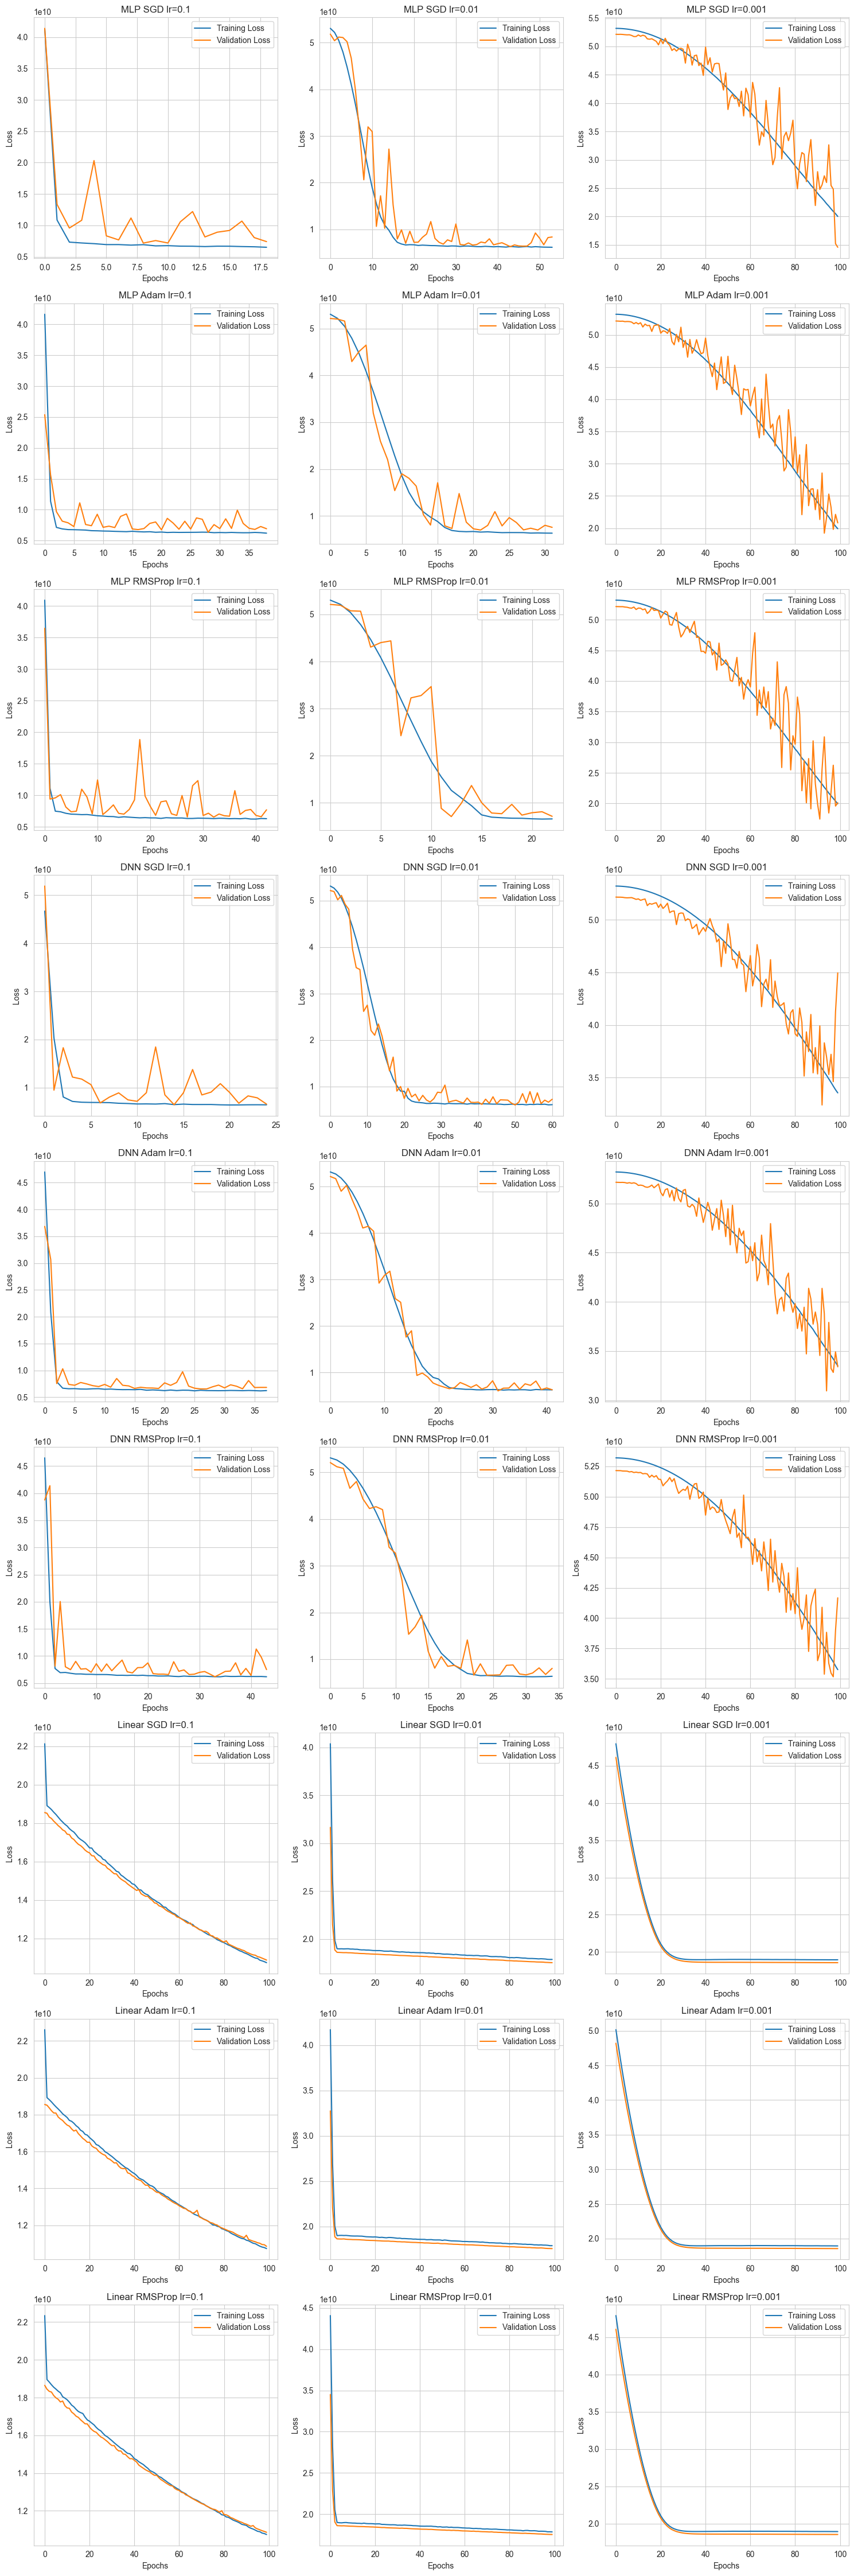

In [26]:

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(
        X_train, 
        y_train, 
        validation_data=(X_test, y_test), 
        epochs=100,
        batch_size=32, 
        verbose=1, 
        callbacks=[early_stopping]
    )
    return history  # Return the entire history

model_types = ['MLP', 'DNN', 'Linear']
optimizers = ['SGD', 'Adam', 'RMSProp']
learning_rates = [0.1, 0.01, 0.001]

best_loss = float('inf')
best_model_info = ""

histories = []
save_dir = 'saved_models'
# Loop
for model_type in model_types:
    for optimizer in optimizers:
        for lr in learning_rates:
            print(f"Training {model_type} with {optimizer} optimizer and learning rate {lr}")

            
            # Define the model filename
            model_name = f"{model_type}_{optimizer}_lr{lr}.h5"
            model_path = os.path.join(save_dir, model_name)
            
            # Check if the model file already exists
            if os.path.exists(model_path):
                print(f"Loading existing model: {model_name}")
                model = load_model(model_path)
            else:
                model = build_model(model_type, input_dim=X_train.shape[1], optimizer=optimizer, lr=lr)
            
            history = train_model(model, X_train, y_train, X_test, y_test)
            
            # Store the history
            histories.append((f"{model_type} {optimizer} lr={lr}", history))
            
            # Save the trained model to .h5 file
            model.save(model_path)

            # Extract the final validation loss from the history
            final_val_loss = history.history['val_loss'][-1]
            
            if final_val_loss < best_loss:
                best_loss = final_val_loss
                best_model_info = f"Best Model: {model_type}, Optimizer: {optimizer}, Learning Rate: {lr}"
print(best_model_info)

# Plotting all models in a grid using subplots
num_models = len(histories)
cols = 3  # Number of columns
rows = num_models // cols
if num_models % cols:
    rows += 1

fig, axs = plt.subplots(rows, cols, figsize=(15, rows*5))
for idx, (model_name, history) in enumerate(histories):
    ax = axs[idx // cols][idx % cols]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(model_name)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# If there are any empty subplots, remove them
if rows*cols > num_models:
    for j in range(num_models, rows*cols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()












In [27]:
# Define the number of epochs and learning rate
epochs = 100  # Choose an appropriate value
lr = 1   # A common initial value, but adjust based on experiments or requirements

# Build the model using the best_model_info
best_model = build_model(best_model_info[0], X_train.shape[1], best_model_info[1], lr)


# Fit the model
best_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

# Make Predictions
predictions = best_model.predict(X_test)

# Review the MAE
mae = tf.keras.losses.MeanAbsoluteError()
loss_value = mae(y_test, predictions).numpy()
print(f"MAE on validation data for best model: {loss_value}")


Epoch 1/100
495/495 [==============================] - 3s 4ms/step - loss: 40357904384.0000 - mae: 172356.9688 - mse: 40357904384.0000 - val_loss: 32674365440.0000 - val_mae: 151736.0781 - val_mse: 32674365440.0000
Epoch 2/100
495/495 [==============================] - 2s 4ms/step - loss: 28148572160.0000 - mae: 137256.0000 - mse: 28148572160.0000 - val_loss: 24324143104.0000 - val_mae: 125267.6406 - val_mse: 24324143104.0000
Epoch 3/100
495/495 [==============================] - 2s 4ms/step - loss: 22204794880.0000 - mae: 117426.3125 - mse: 22204794880.0000 - val_loss: 20530319360.0000 - val_mae: 112526.2266 - val_mse: 20530319360.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 19831150592.0000 - mae: 108637.3516 - mse: 19831150592.0000 - val_loss: 19137804288.0000 - val_mae: 107412.1406 - val_mse: 19137804288.0000
Epoch 5/100
495/495 [==============================] - 2s 3ms/step - loss: 19133161472.0000 - mae: 105203.1406 - mse: 19133161472.0000 - val

# Now we perform the predictions based on the best model obtained above 

In [28]:
# Define the number of epochs and learning rate
epochs = 100  # Choose an appropriate value
lr = 1   # A common initial value, but adjust based on experiments or requirements

# Build the model using the best_model_info
best_model = build_model(best_model_info[0], X_train.shape[1], best_model_info[1], lr)


# Fit the model
best_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

# Make Predictions
predictions = best_model.predict(X_test)

# Review the MAE
mae = tf.keras.losses.MeanAbsoluteError()
loss_value = mae(y_test, predictions).numpy()
print(f"MAE on validation data for best model: {loss_value}")


# Calculate MSE
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(y_test, predictions).numpy()
print(f"MSE on validation data for best model: {mse_value}")

# Calculate RMSE
rmse_value = tf.sqrt(mse_value)
print(f"RMSE on validation data for best model: {rmse_value}")

Epoch 1/100
495/495 [==============================] - 4s 5ms/step - loss: 42324439040.0000 - mae: 177234.1562 - mse: 42324439040.0000 - val_loss: 34209845248.0000 - val_mae: 156305.7188 - val_mse: 34209845248.0000
Epoch 2/100
495/495 [==============================] - 2s 4ms/step - loss: 29351657472.0000 - mae: 140975.1094 - mse: 29351657472.0000 - val_loss: 25173673984.0000 - val_mae: 128063.4766 - val_mse: 25173673984.0000
Epoch 3/100
495/495 [==============================] - 2s 4ms/step - loss: 22786551808.0000 - mae: 119439.5078 - mse: 22786551808.0000 - val_loss: 20905234432.0000 - val_mae: 113791.7109 - val_mse: 20905234432.0000
Epoch 4/100
495/495 [==============================] - 2s 4ms/step - loss: 20059684864.0000 - mae: 109502.1250 - mse: 20059684864.0000 - val_loss: 19284377600.0000 - val_mae: 108023.0625 - val_mse: 19284377600.0000
Epoch 5/100
495/495 [==============================] - 2s 4ms/step - loss: 19204399104.0000 - mae: 105587.7500 - mse: 19204399104.0000 - val